In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [2]:
col_names = ['SL','SW','PL','PW','Classification']
# load dataset
data = pd.read_csv("Iris_Data.csv")
data.head()

,SL,SW,PL,PW,Classification
0,5.0,3.5,1.3,0.3,Setosa
1,7.9,3.8,6.4,2.0,Virginica
2,5.8,2.8,5.1,2.4,Virginica
3,5.7,2.6,3.5,1.0,Versicolor
4,5.4,3.9,1.7,0.4,Setosa


In [3]:
feature_cols = ['SL','SW','PL','PW']
X = data[feature_cols] # Features
y = data.Classification# Target variable

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [6]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


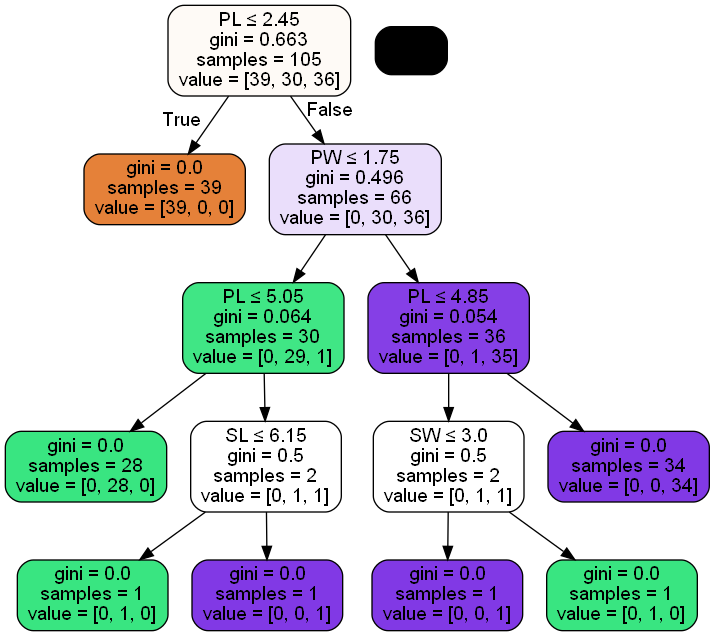

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())